# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, eta_homeo=0.05, alpha_homeo=0.15, verbose=0)
experiments = SHL_set(opts, tag=tag)

In [4]:
%%writefile {experiments.shl.data_cache}/{tag}.py

from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, eta_homeo=0.05, alpha_homeo=0.7, verbose=0)
experiments = SHL_set(opts, tag=tag)
for variable in ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']:
    experiments.scan(variable=variable, list_figures=[], display='')


Overwriting data_cache/HAP.py


In [5]:
!ls -l {experiments.shl.data_cache}/{tag}*
!rm -fr {experiments.shl.data_cache}/{tag}*lock*

-rw-r--r--  1 lolo  staff  1924266 Feb 20 15:17 data_cache/HAP - alpha_homeo=0.015_dico.pkl
-rw-r--r--  1 lolo  staff  1924266 Feb 20 16:00 data_cache/HAP - alpha_homeo=0.03231652035047825_dico.pkl
-rw-r--r--  1 lolo  staff  1924266 Feb 20 16:40 data_cache/HAP - alpha_homeo=0.06962383250419167_dico.pkl
-rw-r--r--  1 lolo  staff  1924266 Feb 20 17:18 data_cache/HAP - alpha_homeo=0.15_dico.pkl
-rw-r--r--  1 lolo  staff  1924266 Feb 20 17:54 data_cache/HAP - alpha_homeo=0.3231652035047825_dico.pkl
-rw-r--r--  1 lolo  staff  1924266 Feb 20 18:33 data_cache/HAP - alpha_homeo=0.6962383250419166_dico.pkl
-rw-r--r--  1 lolo  staff  1924266 Feb 20 19:13 data_cache/HAP - alpha_homeo=1.5_dico.pkl
-rw-r--r--  1 lolo  staff  1924266 Feb 20 10:28 data_cache/HAP - eta=0.00030000000000000003_dico.pkl
-rw-r--r--  1 lolo  staff  1924266 Feb 20 11:11 data_cache/HAP - eta=0.000646330407009565_dico.pkl
-rw-r--r--  1 lolo  staff  1924266 Feb 20 11:49 data_cache/HAP - eta=0.0013924766500838337_dico.pkl
-rw-r

In [6]:
%run {experiments.shl.data_cache}/{tag}.py

## Homeostasis à-la-SparseNet on the activation probability

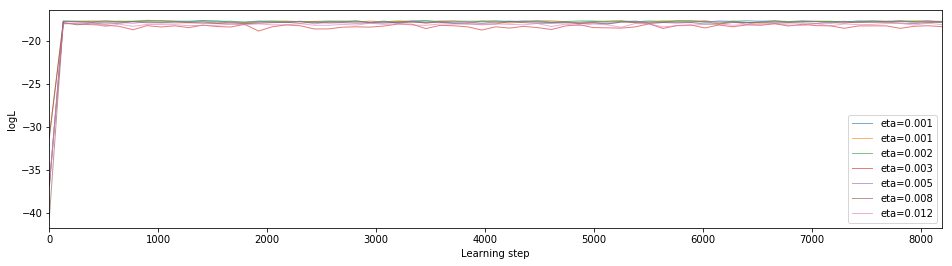

error


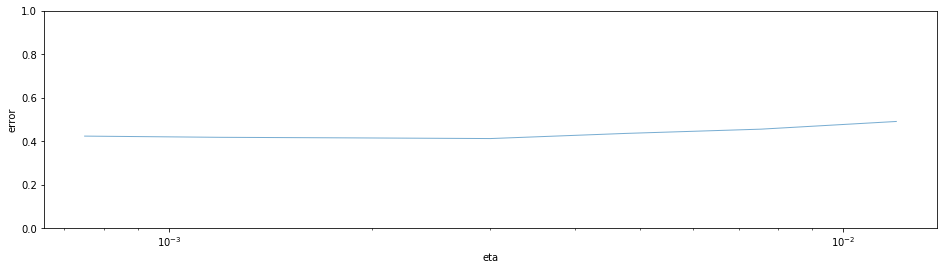

logL


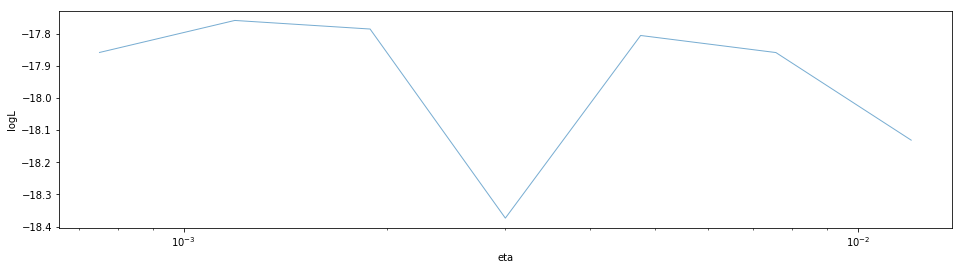

cputime


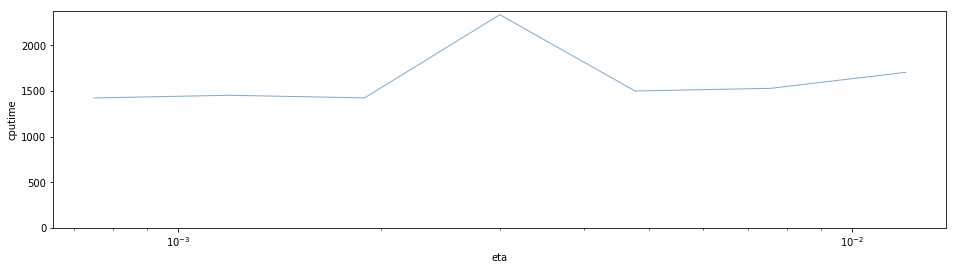

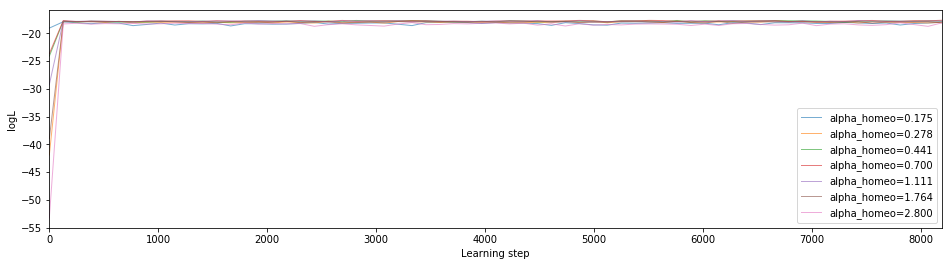

error


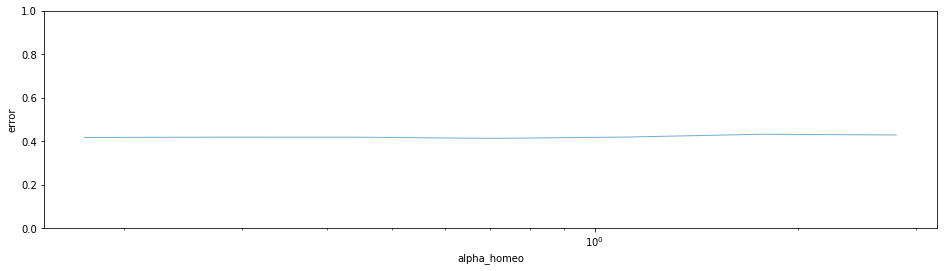

logL


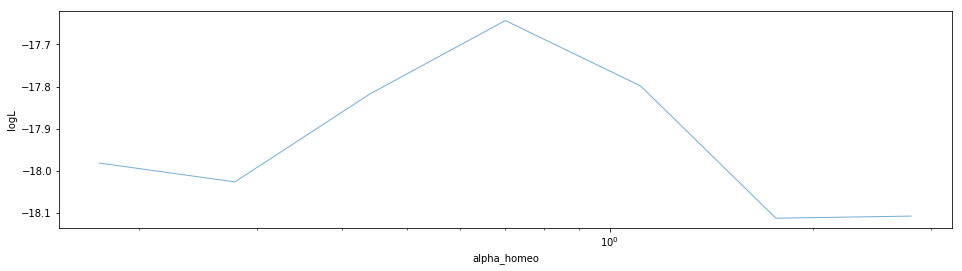

cputime


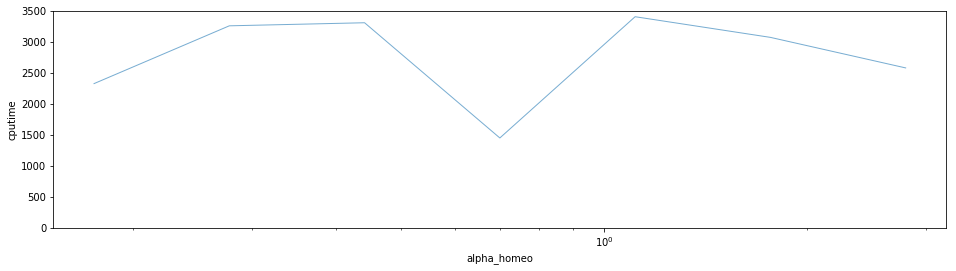

In [ ]:
#fig, ax = experiments.scan(variable='eta', list_figures=[], display='dynamic')
#fig, ax = experiments.scan(variable='eta', list_figures=[], display='final')
list_figures = ['show_dico']
display_variables = ['error', 'logL', 'cputime']
for variable in ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']:
    experiments = SHL_set(opts, tag=tag)
    experiments.scan(variable='eta', list_figures=[], display='')
    plt.show()
    fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic')
    plt.show()
    for display_variable in display_variables:
        print(display_variable)
        fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                   label=tag, display_variable=display_variable)
        plt.show()


## different sparseness


## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas